In [1]:
import os
import pandas as pd
import sklearn
import csv
import datetime
import numpy as np
import japanize_matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

/Users/nobu/opt/anaconda3/envs/prophet_env/lib/python3.7/site-packages/japanize_matplotlib/__init__.py:13: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [2]:
df = pd.read_csv("data/DJIA.csv")

In [3]:
df

,DATE,DJIA
0,2014-10-13,16321.07
1,2014-10-14,16315.19
2,2014-10-15,16141.74
3,2014-10-16,16117.24
4,2014-10-17,16380.41
...,...,...
1300,2019-10-07,26478.02
1301,2019-10-08,26164.04
1302,2019-10-09,26346.01
1303,2019-10-10,26496.67


In [4]:
df.dtypes

DATE    object
DJIA    object
dtype: object

In [5]:
df["DJIA"] = df["DJIA"].replace(".", None)

In [6]:
df["DJIA"] = df["DJIA"].astype(np.float64)

In [7]:
df["DJIA"]

0       16321.07
1       16315.19
2       16141.74
3       16117.24
4       16380.41
          ...   
1300    26478.02
1301    26164.04
1302    26346.01
1303    26496.67
1304    26816.59
Name: DJIA, Length: 1305, dtype: float64

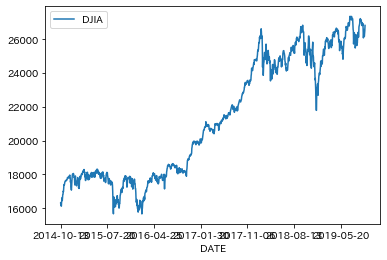

In [8]:
df.plot(x="DATE", y="DJIA")

In [9]:
df.dtypes

DATE     object
DJIA    float64
dtype: object

In [10]:
df["DATE"] = pd.to_datetime(df["DATE"])
df["DATE"]

0      2014-10-13
1      2014-10-14
2      2014-10-15
3      2014-10-16
4      2014-10-17
          ...    
1300   2019-10-07
1301   2019-10-08
1302   2019-10-09
1303   2019-10-10
1304   2019-10-11
Name: DATE, Length: 1305, dtype: datetime64[ns]

In [11]:
max(df["DATE"]), min(df["DATE"])

(Timestamp('2019-10-11 00:00:00'), Timestamp('2014-10-13 00:00:00'))

In [12]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [13]:
df["ds"] = df["DATE"]
df["y"] = df["DJIA"]

In [14]:
df_train = df[df["DATE"] <= "2019-7-31"]
df_test   = df[(df["DATE"] >="2019-8-1")]

In [15]:
train_size = len(df_train)
test_size = len(df_test)
train_size, test_size

(1253, 52)

In [16]:
m = Prophet()
m.fit(df[:train_size])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
future = m.make_future_dataframe(periods = 30, freq = "d")
future

,ds
0,2014-10-13
1,2014-10-14
2,2014-10-15
3,2014-10-16
4,2014-10-17
...,...
1278,2019-08-26
1279,2019-08-27
1280,2019-08-28
1281,2019-08-29


In [18]:
future['day'] = future['ds'].dt.weekday
forecast = m.predict(future)

In [19]:
m.plot(forecast)
plt.plot(df[train_size: train_size + test_size].ds, df[train_size:train_size+test_size].y,".",color="red",alpha)

SyntaxError: positional argument follows keyword argument (<ipython-input-19-921fb0bb4bd4>, line 2)

In [20]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-10-13,17025.236696,16549.006003,17784.686009,17025.236696,17025.236696,118.598220,118.598220,118.598220,162.024817,162.024817,162.024817,-43.426597,-43.426597,-43.426597,0.0,0.0,0.0,17143.834916
1,2014-10-14,17035.701847,16492.544345,17753.629072,17035.701847,17035.701847,98.345865,98.345865,98.345865,163.991333,163.991333,163.991333,-65.645468,-65.645468,-65.645468,0.0,0.0,0.0,17134.047712
2,2014-10-15,17046.166997,16529.063376,17772.633047,17046.166997,17046.166997,85.436980,85.436980,85.436980,171.146886,171.146886,171.146886,-85.709906,-85.709906,-85.709906,0.0,0.0,0.0,17131.603977
3,2014-10-16,17056.632147,16479.906748,17726.720135,17056.632147,17056.632147,72.973640,72.973640,72.973640,176.301230,176.301230,176.301230,-103.327591,-103.327591,-103.327591,0.0,0.0,0.0,17129.605787
4,2014-10-17,17067.097298,16493.580006,17736.610140,17067.097298,17067.097298,59.480788,59.480788,59.480788,177.742795,177.742795,177.742795,-118.262008,-118.262008,-118.262008,0.0,0.0,0.0,17126.578085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,2019-08-26,26190.099136,25973.219985,27256.390057,26158.441224,26215.584816,416.182665,416.182665,416.182665,162.024817,162.024817,162.024817,254.157847,254.157847,254.157847,0.0,0.0,0.0,26606.281801
1279,2019-08-27,26193.899258,25916.372398,27266.475367,26159.377931,26221.245514,406.648214,406.648214,406.648214,163.991333,163.991333,163.991333,242.656882,242.656882,242.656882,0.0,0.0,0.0,26600.547472
1280,2019-08-28,26197.699379,25962.117867,27255.448577,26159.867527,26228.810464,402.384690,402.384690,402.384690,171.146886,171.146886,171.146886,231.237804,231.237804,231.237804,0.0,0.0,0.0,26600.084069
1281,2019-08-29,26201.499500,25917.943566,27250.118208,26161.187931,26238.831082,396.327356,396.327356,396.327356,176.301230,176.301230,176.301230,220.026125,220.026125,220.026125,0.0,0.0,0.0,26597.826856


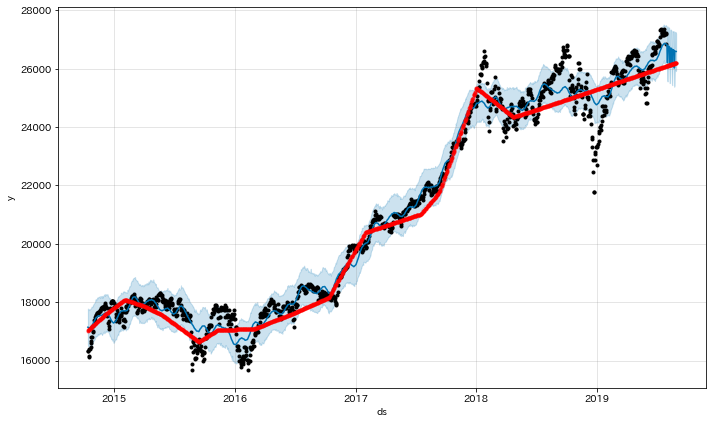

In [21]:
m.plot(forecast)
plt.plot(forecast.ds, forecast.trend, ".", color="red", alpha=0.6)

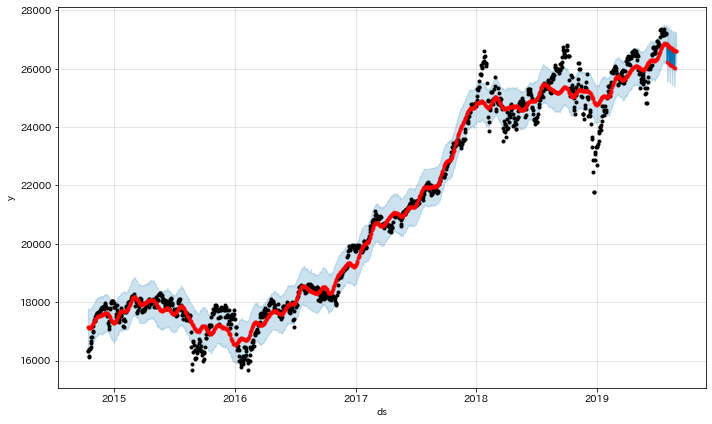

In [22]:
m.plot(forecast)
plt.plot(forecast.ds, forecast.yhat, ".", color="red", alpha=0.6)

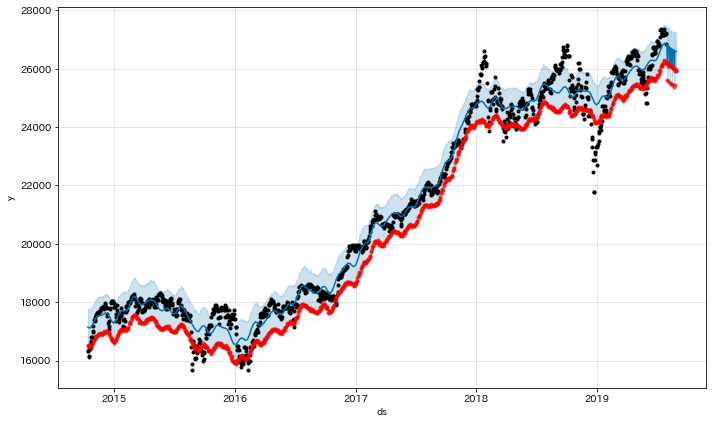

In [23]:
m.plot(forecast)
plt.plot(forecast.ds, forecast.yhat_lower, ".", color="red", alpha=0.6)

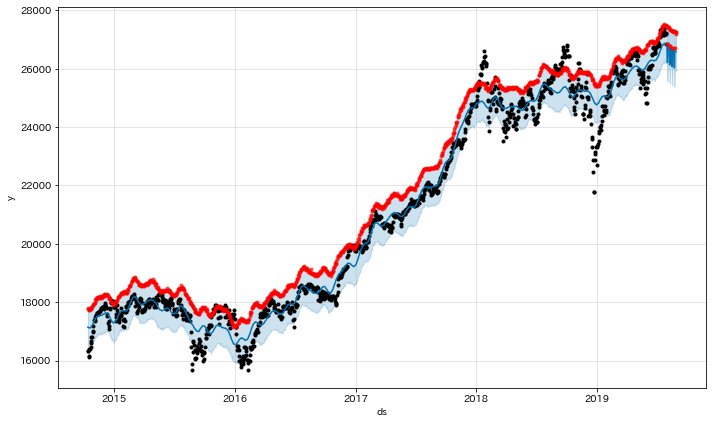

In [24]:
m.plot(forecast)
plt.plot(forecast.ds, forecast.yhat_upper, ".", color="red", alpha=0.6)

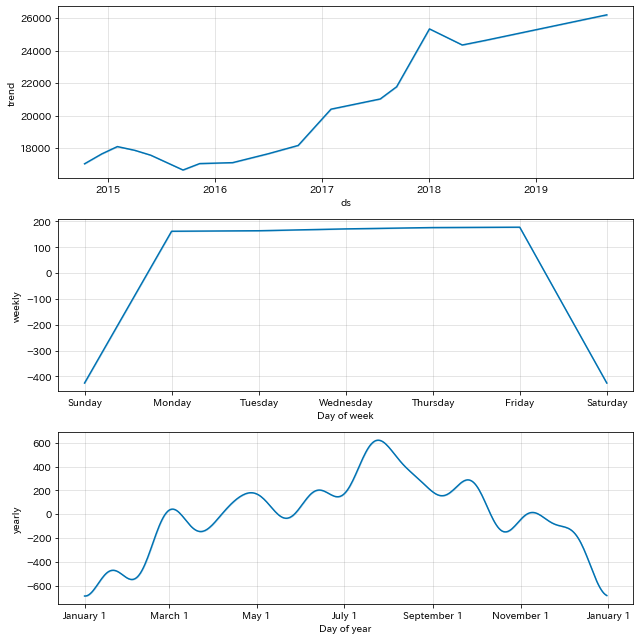

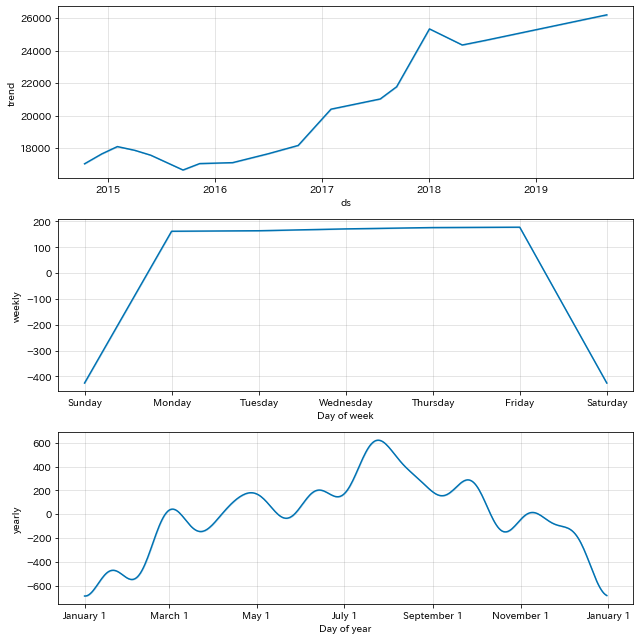

In [25]:
m.plot_components(forecast)

In [26]:
today = datetime.date(2019, 10, 11)
df[df["DATE"] < today]

TypeError: Invalid comparison between dtype=datetime64[ns] and date

In [28]:
def fit_past_data(today):
    df_train = df[df["DATE"] < today]
    train_size = len(df_train)
    m = Prophet(daily_seasonality = True)
    m.fit(df[:train_size])
    return m

def predict(m, today):
    today_df = pd.DataFrame([])
    today_df["ds"] = [today]
    return m.predict(today_df)

def anomaly_detection(y_test, y_upper, y_lower):
    return (y_test > y_upper) | (y_test < y_lower)

In [30]:
anomaly_data = []
for date in df[df["DATE"] >= "2019-08-11"]["DATE"] .values:
    m = fit_past_data(date)
    y_pred = predict(m, date)
    
    y_upper = y_pred["yhat_upper"].values[0]
    y_lower = y_pred["yhat_lower"].values[0]
    
    y_test = df[df["DATE"] == date]["y"].values[0]
    anomaly = anomaly_detection(y_test, y_upper, y_lower)
    
    anomaly_data.append(
        [date, anomaly]
    )
    print(date, anomaly)

2019-08-12T00:00:00.000000000 False
2019-08-13T00:00:00.000000000 False
2019-08-14T00:00:00.000000000 True
2019-08-15T00:00:00.000000000 True
2019-08-16T00:00:00.000000000 False
2019-08-19T00:00:00.000000000 False
2019-08-20T00:00:00.000000000 False
2019-08-21T00:00:00.000000000 False
2019-08-22T00:00:00.000000000 False
2019-08-23T00:00:00.000000000 False
2019-08-26T00:00:00.000000000 False
2019-08-27T00:00:00.000000000 False
2019-08-28T00:00:00.000000000 False
2019-08-29T00:00:00.000000000 False
2019-08-30T00:00:00.000000000 False
2019-09-02T00:00:00.000000000 False
2019-09-03T00:00:00.000000000 False
2019-09-04T00:00:00.000000000 False
2019-09-05T00:00:00.000000000 False
2019-09-06T00:00:00.000000000 False
2019-09-09T00:00:00.000000000 False
2019-09-10T00:00:00.000000000 False
2019-09-11T00:00:00.000000000 True
2019-09-12T00:00:00.000000000 True
2019-09-13T00:00:00.000000000 True
2019-09-16T00:00:00.000000000 False
2019-09-17T00:00:00.000000000 False
2019-09-18T00:00:00.000000000 Fal

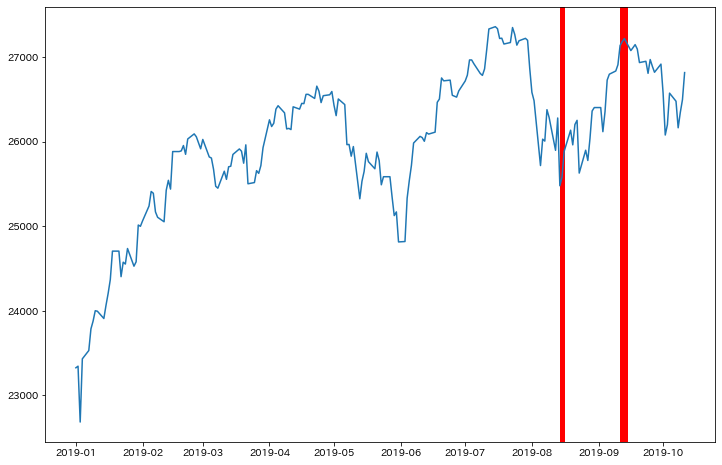

In [31]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.plot(df[df.ds >= "2019-01-01"].ds, df[df.ds >= "2019-01-01"].y)
for v in anomaly_data:
    if v[1]:
        ax.axvspan(v[0],v[0] + np.timedelta64(1, "D"), color="red")